# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
# It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible 
# delay is key to doing good research.



In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
# along with a large collection of high-level mathematical functions to operate on these arrays.
# Sequential - It creates a model that is a linear stack of layers.
# Flatten - It flattens the input and also it does not affect the batch size.
# Convolution2D - This actually performs the 2D convolution on the input vector and produce the convoluted output.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Loads the mnist training and testing data into respective variables.

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


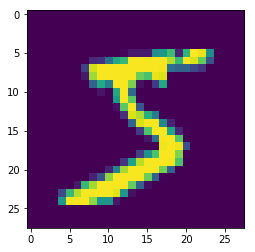

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# Matplotlib is a Python 2D plotting library which produces publication quality figures 
# in a variety of hardcopy formats and interactive environments across platforms. 
# Here we use it to show an example of how an image in a mnist training data looks like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# numpy.reshape() gives a new shape to an array without changing its data.
# Here it is done to indicate the the number of color channels , here it is 1 as it is a grayscale image.
# If it was a RGB it will be changed to 3.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# ndarray.astype() is used to cast a copy of the array to a specified type.
# And we divide the whole training and testing data by 255 to normalise it to values between 0 and 1.

In [8]:
y_train[:10]

# Here we print the training outputs to check whether all 10 distinct outputs are there or not.

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# to_categorical - Converts a class vector (integers) to binary class matrix.
# It returns binary matrix representation of the input, where the bit corresponding to each class number wiil be 1 and 
# everything else is 0.

In [10]:
Y_train[:10]

# Here we print out the binary matrix representation of the training output. 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #Receptive Field = 3x3
model.add(Convolution2D(64, 3, 3, activation='relu')) #input_shape=(26,26,32) #Receptive Field = 5x5
model.add(Convolution2D(128, 3, 3, activation='relu')) #input_shape=(24,24,64) #Receptive Field = 7x7

model.add(MaxPooling2D(pool_size=(2, 2))) #input_shape=(22,22,128)

model.add(Convolution2D(32, 3, 3, activation='relu')) #input_shape=(11,11,128) #Receptive Field = 14x14
model.add(Convolution2D(64, 3, 3, activation='relu')) #input_shape=(9,9,256) #Receptive Field = 16x16
model.add(Convolution2D(128, 3, 3, activation='relu')) #input_shape=(7,7,512) #Receptive Field = 18x18
model.add(Convolution2D(256, 3, 3, activation='relu')) #input_shape=(5,5,1024) #Receptive Field = 20x20
model.add(Convolution2D(10, 3, 3, activation='relu')) #input_shape=(3,3,2048) #Receptive Field = 22x22

model.add(Flatten()) #input_shape=(1,1,10) 
model.add(Activation('softmax')) #input_shape=(10)

model.summary()

# As we know Sequential creates a model that is a linear stack of layers.model.add() adds layers one by one  in this stack.
# Activation - It can be used through an Activation layer, or through the activation argument supported by all forward layers.
# Here we use 'relu 'in the argument of add(). ReLU converts all the pixel values between [-1,1] to [0,1].
# MaxPooling2D - It performs Max pooling operation for spatial data. Here we spcify 2x2 maxpooling , therefore it will take the max 
# value of various 2x2 sections of the image , and the output size of the image will reduce by half or else in other words 
# we filter out 75% of data.
# Here the size of the convolution filter is 3x3 for layers. 
# At last we flatten the data using Flatten() and using softmax activation to get the final output.
# Softmax - It is used because some vector components could be negative, or greater than one; and might not sum to 1, but after applying 
# softmax,each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities.
# And during prediction the highest probability one will be taken as the output and if this matches the ground truth , 
# we have a correct prediction , otherwise a false prediction.
# The first argument of the Convolution2D is the number of 3x3 filters that is used in that layer
# summary() prints the summary of the whole network.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 10)          11530     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# complile() configures the model for training and we define what all metrics is calculated during training, 
# here its accurancy only.
# categorical_crossentropy- It is a Softmax activation plus a Cross-Entropy loss. If we use this loss, we will train a CNN to output a probability over the 
# C-classes for each image.
# Since we have mulitple classes , we use categorical crossentropy to calculate the loss.
# Adam - Adam is an optimization algorithm that can used to update network weights iterative based in training data.
# After calculating the loss, we use adam with the help of the categorical_crossentropy loss calculated of the training data.


In [15]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

# fit() trains the above model for a given number of epochs.
# Epochs are the number of iterations on a dataset.
# We also define batch size = 32 , which the number of images passed through the network for each epoch.
# verbose is set to 1 so that we can see the progess bar.

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 10s 167us/step - loss: 0.5784 - acc: 0.7729
Epoch 2/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.4917 - acc: 0.7942
Epoch 3/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.4803 - acc: 0.7970
Epoch 4/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.4732 - acc: 0.7990
Epoch 5/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.4689 - acc: 0.7999
Epoch 6/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.4658 - acc: 0.8005
Epoch 7/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.4637 - acc: 0.8011
Epoch 8/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.4612 - acc: 0.8018
Epoch 9/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.4601 - acc: 0.8020
Epoch 10/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.4592 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

# evaluvate() returns the loss value & accuracy for the model in test mode.
# Here also computation is done in batches.

In [0]:
print(score)

# Here we the test score , which is a list of scalars which includes loss and accuracy.

In [0]:
y_pred = model.predict(X_test)

# predict() generates output predictions for the input samples.
# Here also computation is done in batches.

In [0]:
print(y_pred[:9])
print(y_test[:9])

# Here we print the output predictions from the model and the outputs from the ground truth, 
# to check how much correct predictions we got.

This network is not efficient because the number of parameters towards the end of the network, is too huge to handle. We can decrease the number of feature maps after the first max pooling layer, thereby reducing the number of parameters , therefore increasing the accuracy. The accuracy can also be increases by redcing the number of convolution layers along with this, which will reduce overfitting and increase accuracy. And also the receptive field at the last layer is not equal to the the size of the image , therefore a lot of data is lost while processing the images. One way to fix this is using one more maxpooling layer , therfore increasing the receptive field of the network, therfore retaining important data. And also by increasing the batch size and number of epochs , we can increase the accuracy of the network. 